In [1]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from time import clock

In [2]:
from get_MNIST import *
MNIST_training_data = get_labeled_data('./data/training.pickle')
MNIST_test_data = get_labeled_data('./data/testing.pickle')

yes
yes


In [3]:
X_train = MNIST_training_data['x'].reshape(-1, 784)[:1000]
y_train = MNIST_training_data['y'].reshape(60000)[:1000]

X_test = MNIST_test_data['x'].reshape(-1, 784)
y_test = MNIST_test_data['y'].reshape(10000)

In [8]:
from tqdm import tqdm
    
accs = []
for k in tqdm(range(10)):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k+1, n_jobs=-1)
    KNN_classifier.fit(X_train, y_train)

    y_pred = KNN_classifier.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))


100%|██████████| 10/10 [01:03<00:00,  6.43s/it]


In [9]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


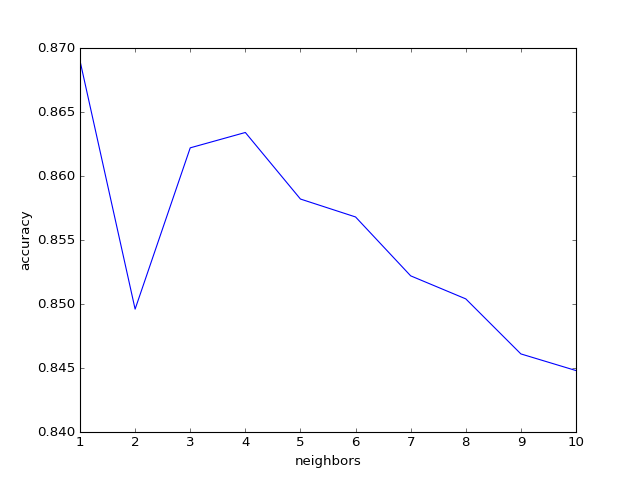

In [10]:
% matplotlib notebook
fig = plt.figure('accuracy')
plt.plot(range(1, len(accs)+1), accs)
plt.xlabel('neighbors')
plt.ylabel('accuracy')

fig.savefig('KNN accuracy.png')


In [11]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

<IPython.core.display.Javascript object>


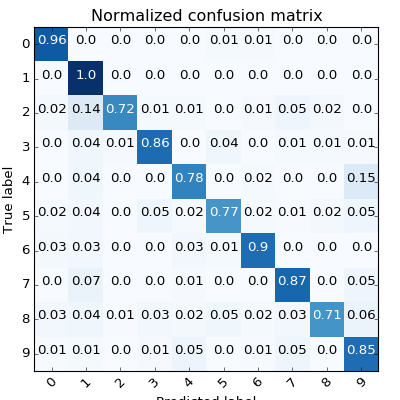

In [12]:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=np.arange(10), normalize=True,
                      title='Normalized confusion matrix')

plt.show()